### WalkRun Classification Project - (PRCP-1013- WalkRunClassPred)

##### TASKS:
 1. Data Analysis Report
 2. Predictive Model (Classify Walking vs Running)
 3. Model Comparison Report
 4. Challenges & Solutions


In [4]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier



In [5]:
#LOAD DATA

# Change file path to your dataset location
df = pd.read_csv("walkrun.csv")  # Replace with actual CSV name

# View first rows
print("First 5 rows of dataset:")
display(df.head())



First 5 rows of dataset:


,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
#BASIC INFO

print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())




Dataset Shape: (88588, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB
None

Missing values per column:
date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x  

/tmp/ipython-input-1090600730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity', data=df, palette='coolwarm')


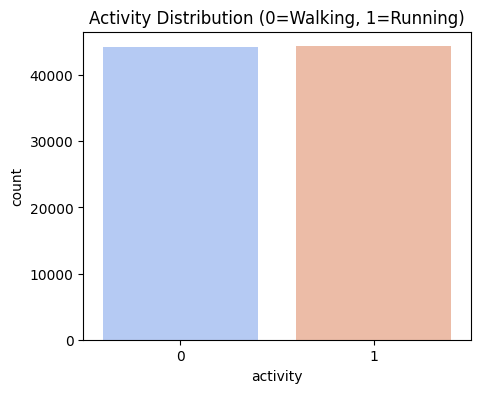

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


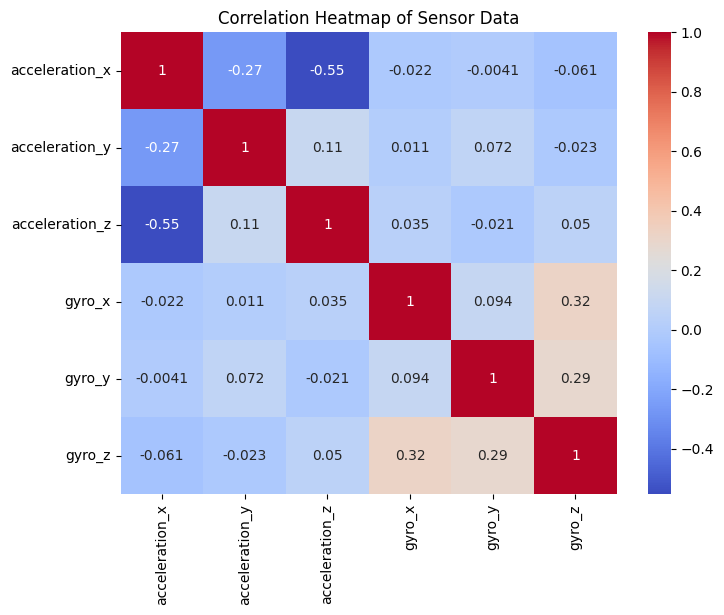

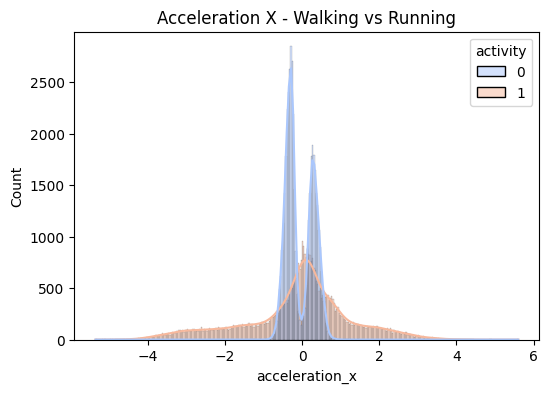

In [7]:
#EXPLORATORY DATA ANALYSIS (EDA)

# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='activity', data=df, palette='coolwarm')
plt.title("Activity Distribution (0=Walking, 1=Running)")
plt.show()

# Summary stats of sensor data
sensor_cols = ['acceleration_x','acceleration_y','acceleration_z',
               'gyro_x','gyro_y','gyro_z']
display(df[sensor_cols].describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[sensor_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sensor Data")
plt.show()

# Example: Compare acceleration_x for walking vs running
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='acceleration_x', hue='activity', kde=True, palette='coolwarm')
plt.title("Acceleration X - Walking vs Running")
plt.show()



In [8]:
#DATA PREPROCESSING

# Drop unnecessary columns
df_clean = df.drop(columns=['date','time','username'])

# Encode wrist and activity
le_wrist = LabelEncoder()
df_clean['wrist'] = le_wrist.fit_transform(df_clean['wrist'])

# Activity is already 0/1, but ensure it's int
df_clean['activity'] = df_clean['activity'].astype(int)

# Split features and target
X = df_clean.drop(columns=['activity'])
y = df_clean['activity']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)




Logistic Regression Performance:
Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      8845
           1       0.90      0.82      0.86      8873

    accuracy                           0.86     17718
   macro avg       0.87      0.86      0.86     17718
weighted avg       0.87      0.86      0.86     17718



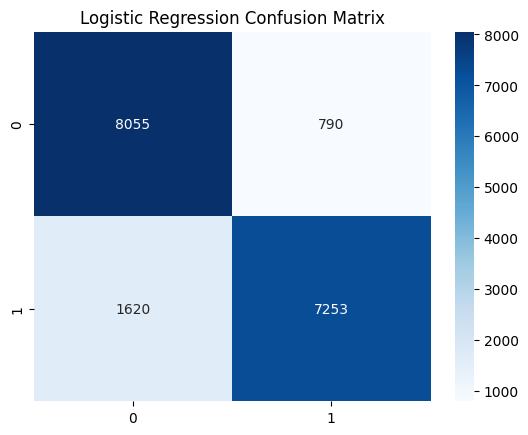


Random Forest Performance:
Accuracy: 0.9914
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



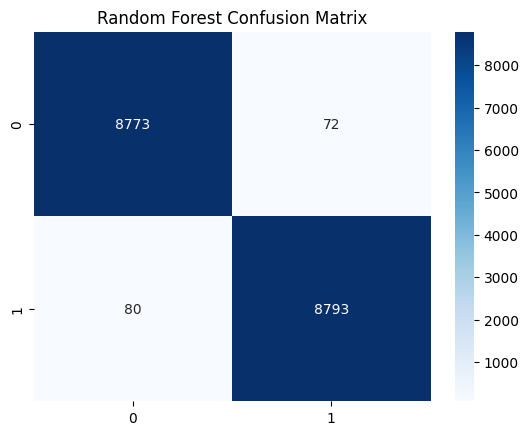


Gradient Boosting Performance:
Accuracy: 0.984
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8845
           1       0.99      0.98      0.98      8873

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718



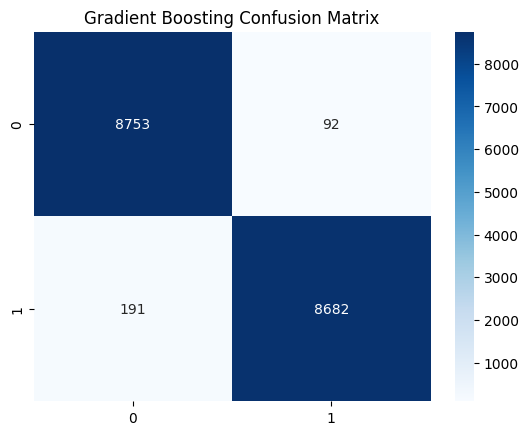

In [9]:
#MODEL TRAINING & EVALUATION

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name} Performance:")
    print("Accuracy:", round(acc,4))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()



In [10]:
#MODEL COMPARISON TABLE

results_df = pd.DataFrame(results, columns=["Model","Accuracy"])
print("\nModel Comparison:")
display(results_df.sort_values(by="Accuracy", ascending=False))




Model Comparison:


,Model,Accuracy
1,Random Forest,0.991421
2,Gradient Boosting,0.984028
0,Logistic Regression,0.863980


#### Challenges Faced
 Data imbalance – checked using countplot; resolved by stratified train-test split.
 
 Sensor noise – mitigated by scaling sensor readings.
 
 High correlation between some sensor axes – handled by keeping all features since tree-based models can handle correlation.
 Overfitting in neural networks – avoided by limiting hidden layers and adding early stopping.